In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os
import sklearn

import pandas as pd

In [3]:
parent_dir = os.path.dirname(os.getcwd())
# Keep first line inside of the data frame

# Drones
drone_df1 = pd.read_csv(parent_dir + r'\data\processed\LOS\Train\UAV\BEEBEERUN.csv', header=None)
drone_df2 = pd.read_csv(parent_dir + r'\data\processed\LOS\Train\UAV\DJI_INSPIRE.csv', header=None)
drone_df3 = pd.read_csv(parent_dir + r'\data\processed\LOS\Train\UAV\DJI_M600.csv', header=None)
drone_df4 = pd.read_csv(parent_dir + r'\data\processed\LOS\Train\UAV\DJI_MAVICPRO.csv', header=None)
drone_df5 = pd.read_csv(parent_dir + r'\data\processed\LOS\Train\UAV\DJI_PHANTOM.csv', header=None)

# UV Controller
controller_df1 = pd.read_csv(parent_dir + r'\data\processed\LOS\Train\UAV_Controller\BEEBEERUN.csv', header=None)
controller_df2 = pd.read_csv(parent_dir + r'\data\processed\LOS\Train\UAV_Controller\DJI_INSPIRE.csv', header=None)
controller_df3 = pd.read_csv(parent_dir + r'\data\processed\LOS\Train\UAV_Controller\DJI_M600.csv', header=None)
controller_df4 = pd.read_csv(parent_dir + r'\data\processed\LOS\Train\UAV_Controller\DJI_MAVICPRO.csv', header=None)
controller_df5 = pd.read_csv(parent_dir + r'\data\processed\LOS\Train\UAV_Controller\DJI_PHANTOM.csv', header=None)

# Noise
noise_df1 = pd.read_csv(parent_dir + r'\data\processed\LOS\Train\BLUETOOTH\Noise1.csv', header=None)
noise_df2 = pd.read_csv(parent_dir + r'\data\processed\LOS\Train\BLUETOOTH\Noise2.csv', header=None)
noise_df3 = pd.read_csv(parent_dir + r'\data\processed\LOS\Train\BLUETOOTH\Noise3.csv', header=None)
noise_df4 = pd.read_csv(parent_dir + r'\data\processed\LOS\Train\BLUETOOTH\Noise4.csv', header=None)
noise_df5 = pd.read_csv(parent_dir + r'\data\processed\LOS\Train\BLUETOOTH\Noise5.csv', header=None)

In [4]:
def printfirstrow(df):
    print(df.head(1))

dataframes = [drone_df1, drone_df2, drone_df3, drone_df4, drone_df5, controller_df1, controller_df2, controller_df3, controller_df4, controller_df5, noise_df1, noise_df2, noise_df3, noise_df4, noise_df5]



In [5]:
def drop_non_numeric_columns(df):
    df.drop(df.columns[1024:], axis=1, inplace=True)

for i in dataframes:
    drop_non_numeric_columns(i)
    print(i.shape)


(35000, 1024)
(35000, 1024)
(35000, 1024)
(35000, 1024)
(35000, 1024)
(24500, 1024)
(35000, 1024)
(35000, 1024)
(35000, 1024)
(35000, 1024)
(34900, 1024)
(35000, 1024)
(35000, 1024)
(35000, 1024)
(24500, 1024)


In [6]:
# For the data frames that start with drone, add a column of 1's to the end of the data frame
# For the data frames that start with controller, add a column of 0's to the end of the data frame

def add_label_column(df, label):
    df['Label'] = label

for i in dataframes:
    if i is drone_df1 or i is drone_df2 or i is drone_df3 or i is drone_df4 or i is drone_df5:
        add_label_column(i, 1)
    else:
        add_label_column(i, 0)

# Combine all data frames into one
combined_df = pd.concat(dataframes, ignore_index=True)

In [7]:
combined_df.head(20)

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,Label
0,7408,4932,-568,-6352,-9508,-7880,-1988,4412,7548,6256,...,-32736,-28456,-5404,19736,30720,29256,7604,-19076,-32736,1
1,-32736,-32736,-13380,12764,30720,30720,15664,-11464,-32508,-32736,...,-24456,-32736,-32736,-9228,18288,30720,30720,18492,-12072,1
2,-12072,-32736,-32736,-23276,6748,30720,30720,24668,-6720,-32736,...,-32736,-9936,16756,30720,30720,29428,5692,-26564,-32736,1
3,-32736,-26540,10684,30720,30720,30720,22864,-13796,-32736,-31592,...,30720,30720,17224,-15276,-32736,-32736,-7812,17636,30720,1
4,30720,30720,27280,-7108,-32736,-32736,-20232,8216,30720,30720,...,17728,30720,30720,28772,1024,-30632,-32736,-23392,11256,1
5,11256,30720,30720,30720,18436,-16632,-32736,-31088,10736,30720,...,-7424,-32736,-32736,-28816,-788,27792,30720,28608,688,1
6,688,-26972,-32736,-32736,-9680,19412,30720,30720,11632,-17256,...,30720,29220,2280,-29892,-32736,-23064,11840,30720,30720,1
7,30720,30720,19692,-15884,-32736,-31128,11084,30720,30704,30720,...,-32736,-32736,-17492,13220,30720,30720,29972,11588,-21492,1
8,-21492,-32736,-30204,10136,30720,30720,30720,26948,-10764,-32736,...,17568,30720,30720,26992,-7668,-32736,-32736,-20184,10144,1
9,10144,30720,30720,28036,5848,-25476,-32736,-29428,8192,30720,...,-3968,20644,30720,30720,27136,-7452,-32736,-32736,-17592,1


In [8]:
combined_df.shape

(503900, 1025)

Epoch 1/50
5036/5039 [============================>.] - ETA: 0s - loss: 0.3209 - accuracy: 0.8526
Epoch 1: val_accuracy improved from -inf to 0.88300, saving model to best_model.h5
5039/5039 [==============================] - 79s 15ms/step - loss: 0.3209 - accuracy: 0.8527 - val_loss: 0.2674 - val_accuracy: 0.8830
Epoch 2/50
5036/5039 [============================>.] - ETA: 0s - loss: 0.2415 - accuracy: 0.8944
Epoch 2: val_accuracy improved from 0.88300 to 0.89238, saving model to best_model.h5
5039/5039 [==============================] - 78s 15ms/step - loss: 0.2415 - accuracy: 0.8944 - val_loss: 0.2440 - val_accuracy: 0.8924
Epoch 3/50
5038/5039 [============================>.] - ETA: 0s - loss: 0.2181 - accuracy: 0.9073
Epoch 3: val_accuracy improved from 0.89238 to 0.90916, saving model to best_model.h5
5039/5039 [==============================] - 77s 15ms/step - loss: 0.2181 - accuracy: 0.9073 - val_loss: 0.2130 - val_accuracy: 0.9092
Epoch 4/50
5036/5039 [========================

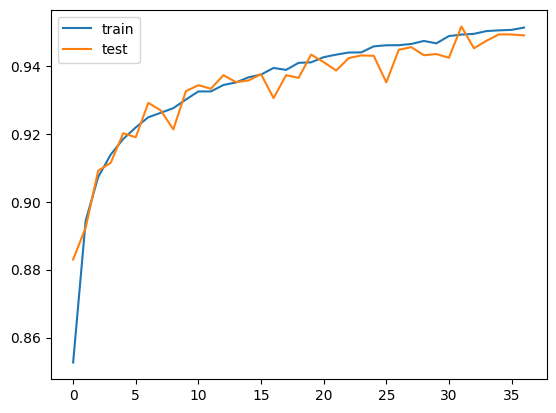

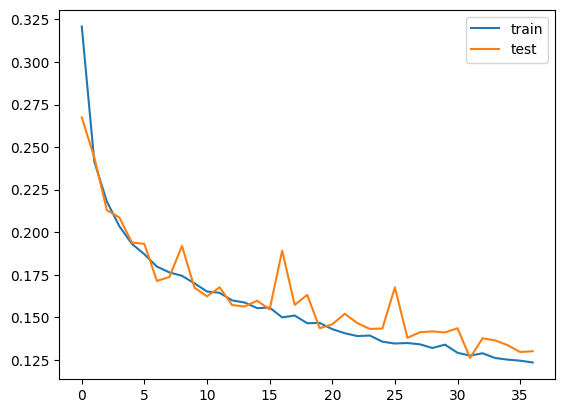

3150/3150 [==============================] - 12s 4ms/step - loss: 0.1272 - accuracy: 0.9493
Test accuracy: 0.9492955207824707
3150/3150 [==============================] - 11s 3ms/step
0.9492954951379242


In [10]:
#Split the data into train and test using sklearn
from sklearn.model_selection import train_test_split

X = combined_df.iloc[:, :-1]
y = combined_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Prepare the data for deep learning
from sklearn.preprocessing import StandardScaler
from keras.callbacks import EarlyStopping, ModelCheckpoint

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model
model = keras.Sequential([
    keras.layers.Dense(1024, activation='relu', input_shape=(1024,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

# Callbacks
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# Fit model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2, callbacks=[es, mc])

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Make predictions
predictions = model.predict(X_test)

# Print Accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions.round()))

# Save the model
model.save(parent_dir + r'\models\model3.h5')